<a href="https://colab.research.google.com/github/jaihirasinghani/DLP13/blob/main/PotatoDiesesDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 16
IMAGE_SIZE = 255
CHANNEL = 3
EPOCHS = 20

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import zipfile

zip_file = 'DLP-13-DataSet.zip'  # The exact name of your file
extract_path = 'DLP-13-DataSet'  # Folder where the contents will be extracted

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped successfully!")


Unzipped successfully!


In [ ]:
dataset_path = '/content/drive/My Drive/cotton_dataset'

train_dir = f'{dataset_path}/train'
test_dir = f'{dataset_path}/test'
valid_dir = f'{dataset_path}/valid'

In [ ]:
import os

base_dir = 'DLP-13-DataSet'  # or the folder where you extracted the zip

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')


In [ ]:
BATCH_SIZE = 16
IMAGE_SIZE = 255
CHANNEL = 3
EPOCHS = 20

In [ ]:
import os

print("Top-level:", os.listdir())  # Show what's in the current directory
print("Inside DLP-13-DataSet:", os.listdir("DLP-13-DataSet"))


Top-level: ['.config', '.ipynb_checkpoints', 'DLP-13-DataSet.zip', 'DLP-13-DataSet', 'drive', 'sample_data']
Inside DLP-13-DataSet: ['Potato']


In [ ]:
os.listdir("DLP-13-DataSet/Potato")


['Train', 'Valid', 'Test']

In [ ]:
import os
os.listdir("DLP-13-DataSet/Potato")


['Train', 'Valid', 'Test']

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='DLP-13-DataSet/Potato/Train',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 900 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print("Image Batch Shape : ", image_batch.shape)
    print("Single Image : ", image_batch[0])
    print("Label Image numpy : ", label_batch.numpy)


Image Batch Shape :  (16, 255, 255, 3)
Single Image :  tf.Tensor(
[[[137.00977 134.00977 145.00977]
  [140.9745  137.9745  148.9745 ]
  [138.9178  135.9178  146.9178 ]
  ...
  [176.90427 174.90427 187.90427]
  [139.31499 137.31499 150.31499]
  [140.14108 138.14108 151.14108]]

 [[138.0215  135.0215  146.0215 ]
  [133.98235 130.98235 141.98235]
  [132.00421 129.00421 140.00421]
  ...
  [187.78297 185.78297 198.78297]
  [185.78818 183.78818 196.78818]
  [212.7296  210.7296  223.7296 ]]

 [[143.00009 140.00009 151.00009]
  [133.05692 130.05692 141.05692]
  [131.13658 128.13658 139.13658]
  ...
  [149.52818 147.52818 160.52818]
  [148.03557 146.03557 159.03557]
  [175.90623 173.90623 186.90623]]

 ...

 [[147.14691 145.14691 158.14691]
  [147.10889 145.10889 158.10889]
  [144.18465 142.18465 155.18465]
  ...
  [191.93228 189.93228 200.93228]
  [221.33481 219.33481 230.33481]
  [188.91684 186.91684 197.91684]]

 [[155.94127 153.94127 166.94127]
  [152.90031 150.90031 163.90031]
  [142.12985

In [ ]:
    print("Label Image numpy : ", label_batch.numpy())


Label Image numpy :  [0 2 2 2 0 1 0 2 0 1 0 0 1 1 2 0]


In [ ]:
len(class_names)

3

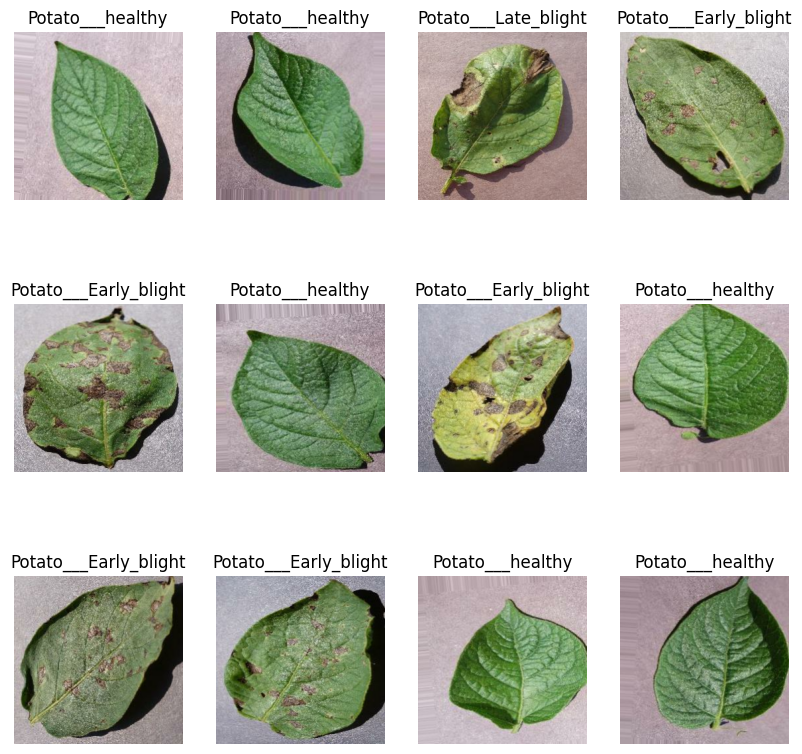

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    # Code to process the first batch of images and labels
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
len(dataset)

57

In [ ]:
train_size = 0.8
len(dataset) * train_size

45.6

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

3

In [ ]:
val_size = 0.1
len(dataset)*val_size

5.7

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

3

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

0

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

45

In [ ]:
len(val_ds)

5

In [ ]:
len(test_ds)

7

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])


In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (16, 255, 255, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (16, 253, 253, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (16, 126, 126, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (16, 124, 124, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (16, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (16, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (16, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (16, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (16, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (16, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (16, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (16, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (16, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (16, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (16, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (16, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.9475 - loss: 0.1257 - val_accuracy: 0.9250 - val_loss: 0.1874
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.9200 - loss: 0.2241 - val_accuracy: 0.9750 - val_loss: 0.0692
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.9371 - loss: 0.1619 - val_accuracy: 0.9750 - val_loss: 0.0861
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.9686 - loss: 0.0703 - val_accuracy: 0.9750 - val_loss: 0.0386
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.9603 - loss: 0.1185 - val_accuracy: 1.0000 - val_loss: 0.0184
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.9657 - loss: 0.0783 - val_accuracy: 0.9750 - val_loss: 0.0446
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.9576 - loss: 0.1635 - val_accuracy: 1.0000 - val_loss: 0.0167
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.9739 - loss: 0.0662 - val_accuracy: 0.9750 - v

In [113]:
scores = model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9485 - loss: 0.1370


In [114]:
model.save("model.h5")

In [116]:

print(history)
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 10, 'steps': 45}
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [117]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.14410173892974854,
 0.18806977570056915,
 0.186562180519104,
 0.05965679511427879,
 0.10668011009693146]

In [118]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

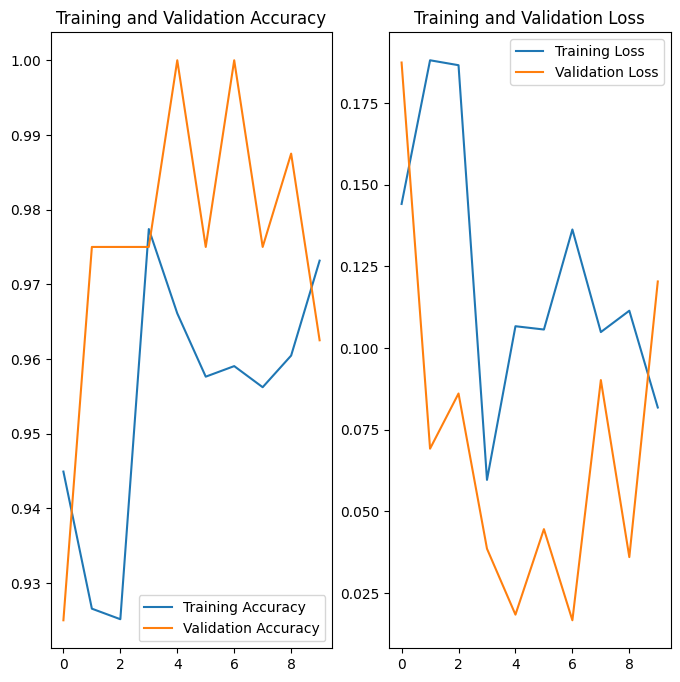

In [119]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [120]:
model = tf.keras.models.load_model('model.h5')

first image to predict
actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Potato___healthy


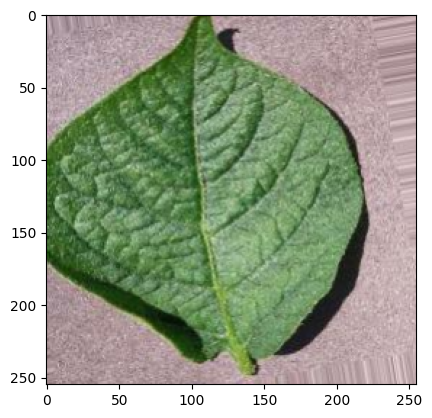

In [121]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [122]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


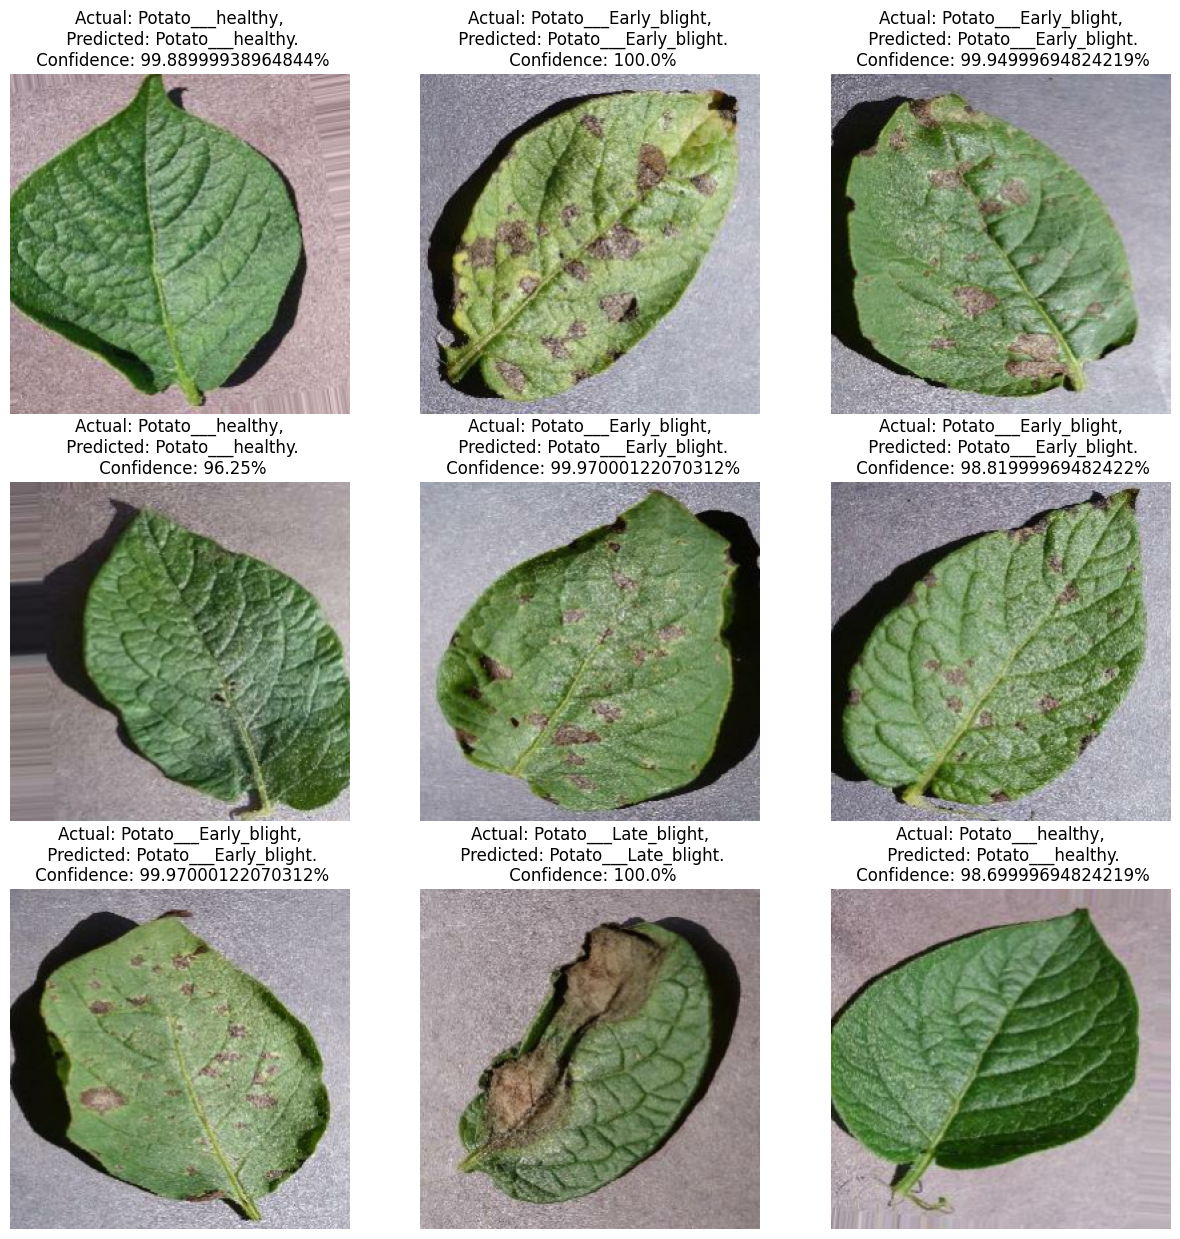

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


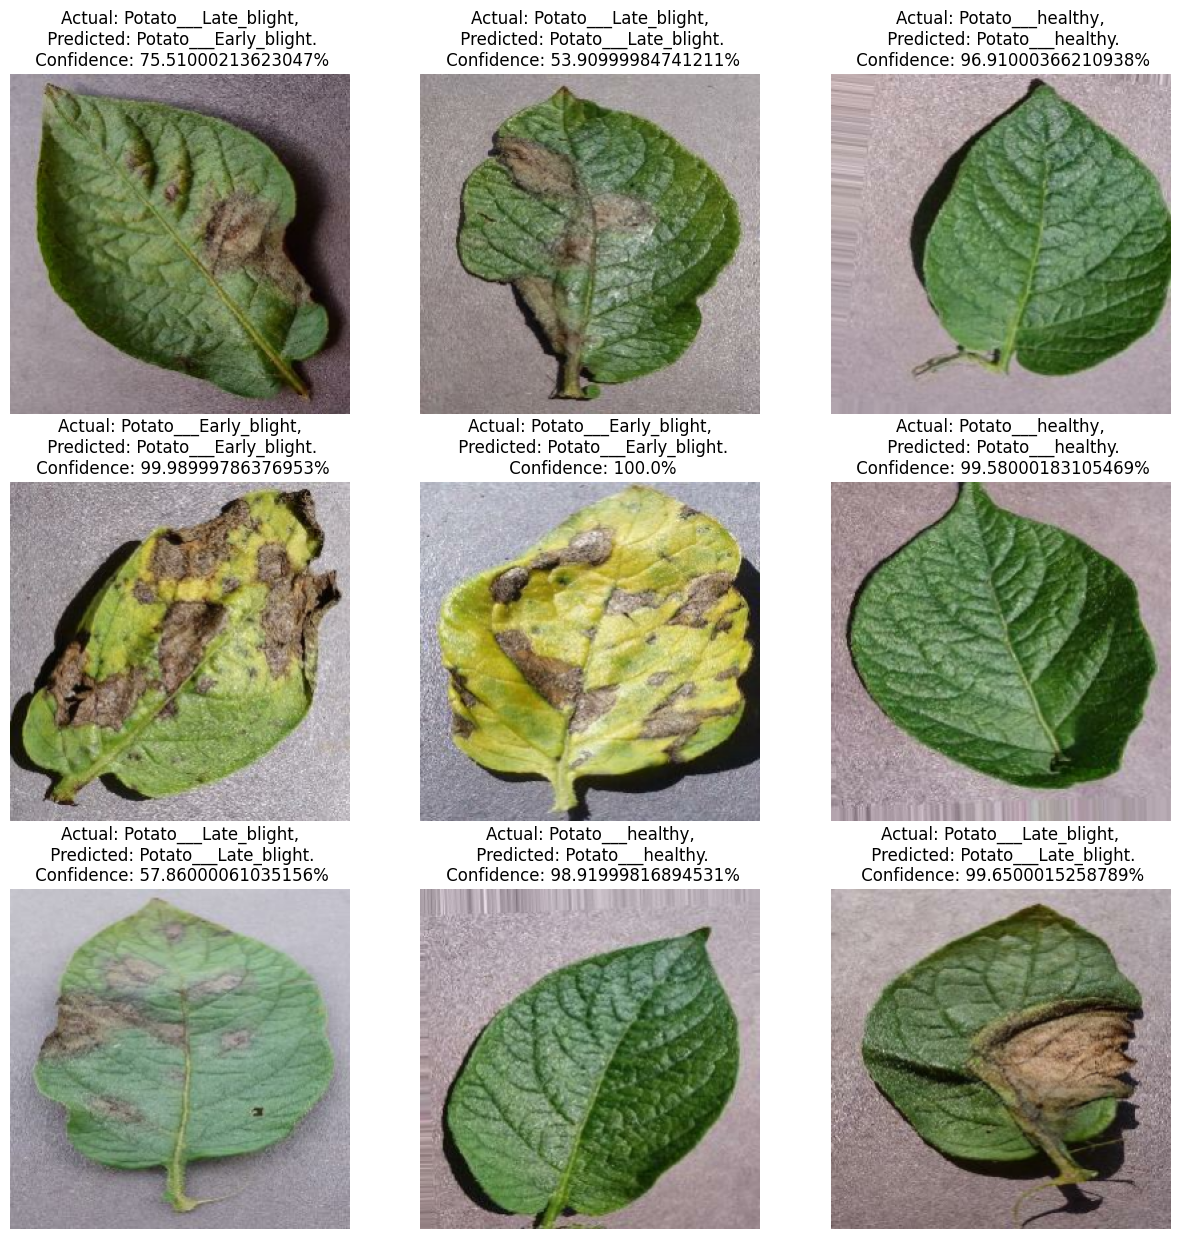

In [124]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")